# Load Cifar-10 data

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# 文件路径
path = "F:\Python_test\KNN_2\cifar-10-batches-py"
file_name = ["\\data_batch_1", "\\data_batch_2", "\\data_batch_3", "\\data_batch_1", "\\data_batch_5", "\\test_batch"]

# 数据数目
train_num = 50000
test_num = 10000
pre_sample = 32 * 32 * 3

In [3]:
# 加载单个文件
def load_noe_file(filename):
    with open(filename, 'rb') as fo:
        data = pickle.load(fo, encoding='latin1')
    return data

In [4]:
cifar = load_noe_file(path+"\data_batch_1")

In [5]:
cifar.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [6]:
cifar["data"].shape

(10000, 3072)

In [7]:
len(cifar["labels"])

10000

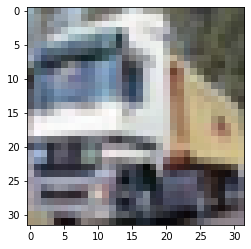

'camion_s_000148.png'

In [8]:
show_data = cifar["data"][1].reshape(3,32,32)
show_data = show_data.transpose(1,2,0)
plt.imshow(show_data) 
plt.show()
cifar["filenames"][1]

In [9]:
def load_Cifar10():
    x = np.empty(shape = (train_num + test_num, pre_sample))
    y = np.empty(shape = train_num + test_num)
    
    for i in range(len(file_name)):
        temp = load_noe_file(path + file_name[i])
        x[i*10000:(i+1)*10000] = temp["data"]
        y[i*10000:(i+1)*10000] = temp["labels"]
    
    return x[:train_num], x[train_num:], y[:train_num], y[train_num:]

In [10]:
x_train, x_test, y_train, y_test = load_Cifar10()

In [11]:
x_train.shape

(50000, 3072)

In [12]:
x_test.shape

(10000, 3072)

In [13]:
y_train.shape

(50000,)

In [14]:
y_test.shape

(10000,)

In [15]:
x_train

array([[ 59.,  43.,  50., ..., 140.,  84.,  72.],
       [154., 126., 105., ..., 139., 142., 144.],
       [255., 253., 253., ...,  83.,  83.,  84.],
       ...,
       [ 35.,  40.,  42., ...,  77.,  66.,  50.],
       [189., 186., 185., ..., 169., 171., 171.],
       [229., 236., 234., ..., 173., 162., 161.]])

In [27]:
# 随机获取样本
def random_sample(x, y, ratio = 0.1):
    example_index = np.random.randint(0,len(x)-1, size = int(len(x) * ratio))
    return x[example_index], y[example_index]

In [28]:
x_train, y_train = random_sample(x_train, y_train)
